# **Packages**

In [ ]:
!pip install hazm

     |████████████████████████████████| 316 kB 23.2 MB/s 
     |████████████████████████████████| 1.4 MB 63.8 MB/s 
     |████████████████████████████████| 233 kB 67.6 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=a476845daa5722c655e2217c9e735fe414928084552c1c8f6103c6a93ca26934
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154018 sha256=3c084208a76556f780edd4af0f346cade75a295f6c9d04a6a958a227a1eb7eed
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install clean-text

     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 174 kB 62.8 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=bd0fbfa945c04ec3aa53a9e881f5b5471b2a6d61499fc793fdfd6cc172d24e86
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=c2ca0a7befe0e74da6150c584dec7a87a545b2ae3a5b76e1c7f0ed2ddc0629e1
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built ftfy emoji


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 32.8 MB/s 
     |████████████████████████████████| 895 kB 38.3 MB/s 
     |████████████████████████████████| 3.3 MB 62.6 MB/s 
     |████████████████████████████████| 596 kB 70.1 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# **Downloading the data**

In [ ]:
!unrar x "/content/drive/MyDrive/train.rar" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/train.rar

Extracting  train.csv                                                     93% 99%  OK 
All OK


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
from __future__ import unicode_literals

In [ ]:
from hazm import *

In [ ]:
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
import re

In [ ]:
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

In [ ]:
import nltk

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

# **Data Preprocessing**

## **Reading the data**

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
test_data = pd.read_csv('drive/MyDrive/CI_test.csv')

In [ ]:
data

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN,not_recommended
2,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,497032,6,1,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ...",recommended
3,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,574130,3,0,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]",recommended
4,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,794316,1,0,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به...",recommended
...,...,...,...,...,...,...,...,...,...,...
48077,842976,لیوان گامین گلس مدل محک بسته 6 عددی,2333505,10,1,بی کیفیت,کاملابی کیفیت، تو هر قیمتی اصلا ارزش خرید نداره,NaN,NaN,not_recommended
48078,362029,کتاب سفید و قرمز نسخه بارسلونا,8369747,0,0,عالی بود خون دن داره,عالیییییییییییییییییییی,NaN,NaN,recommended
48079,818381,بالش بادی پورگونر مدل KMG,8027276,0,0,ارزش خرید نداره,اندازه بالش بسیار کوچک هست بیشتر بدرد بچه ۲ سا...,NaN,NaN,not_recommended
48080,549845,شید آباژور آرام مدل SH45/01,4979401,0,0,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]",recommended


In [ ]:
test_data

,id,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages
0,1,146879,فلاسک غذا خودرو بلک اند دکر مدل BDV212F,2838703,15,12,فقط مناسب سفر طولانی,با توجه به قدرت خنک کنندگی حداقل ۲ ساعت زمان ل...,NaN,NaN
1,2,120648,ادو تویلت مردانه آنتونیو باندراس مدل The Golde...,1307120,5,3,خوش بو,بسیار خوش بو ولی ماندگاری در حد یک ساعت ، با ا...,NaN,NaN
2,3,76932,محلول تقویت و رشد ابرو لامینین 12ml,2724686,8,3,بدون فایده,اصلا تأثیری نداشت,NaN,NaN
3,4,179072,فن هیتر فلر مدل HFC201,2499534,5,0,NaN,کیفیت بدنه خیلی خوبی داره._x000D_\nوقتی در جای...,NaN,NaN
4,5,184047,گوشی موبایل آنر مدل 6X BLN-L21 دو سیم‌ کارت,906159,19,4,فوق العاده در یک کلام,دو ساله استفاده میکنم، واقعاً هیچ کجا برام کم ...,"[""حسگر فوق‌العاده اثرانگشت \r"",""قابلیت تنظیم ف...",NaN
...,...,...,...,...,...,...,...,...,...,...
4995,4996,106518,بخار شوی کرشر مدل SC2 Premium,4477666,0,1,خریدشو پبشنهاد میکنم,من از دی جی کالا خریدم خیلی عالیه._x000D_\nپیش...,"[""قدرت پرتاب بخار بالا""]","[""به نظر من نداره""]"
4996,4997,326261,ظرف نگهدارنده رویچن مدل Crystal Kankan بسته10 ...,1390121,2,0,کاربردی و خوب,خیلی خوبه._x000D_\nاندازه هاش کاربردی و عالیه,NaN,NaN
4997,4998,195433,کرم براق کننده موی سر مدل A Plus E مقدار 120 گرم,2359378,0,0,یه جنس ایرانی خوب,چرب کردن مو باعث جلوگیری از سفیدی زودرس و پیری...,"[""بوی مطبوع و خوب\r"",""حجم زیاد \r"",""چربی کم و ...","[""ضعف آنچنانی ندارد""]"
4998,4999,590683,کاور کوالا مدل Round TPU مناسب برای گوشی موبای...,7622063,0,0,خرابی,بعداز یک ماه زرد میشه از هم در میره,"[""طراحی خوب""]","[""رنگ رفتن \r"",""خراب شدن""]"


In [ ]:
data = pd.concat([data, test_data])

## **StopWords**

In [ ]:
# stopwords_string = ' می های کن کرد کردن باش بود بودن شو شد شدن دار داشت داشتن خواه خواست خواستن گوی گفت گفتن گیر گرفت گرفتن آی آمد آمدن توان توانست توانستن یاب یافت یافتن آور آورد آوردن دیگران همچنان مدت چیز سایر جا طی کل کنونی بیرون مثلا کامل کاملا آنکه موارد واقعی امور امورات اکنون بطور به طور بخشی تحت چگونه عدم نوعی حاضر وضع مقابل کنار خویش نگاه درون زمانی بنابراین بنابرین تو خیلی بزرگ خودش جز اینجا مختلف توسط نوع همچنین آنجا قبل جناح اینها طور شاید ایشان جهت طریق مانند پیدا ممکن کسانی جای کسی غیر بی قابل درباره جدید وقتی اخیر چرا بیش روی طرف جریان زیر آنچه البته فقط چیزی چون برابر هنوز بخش زمینه بین بدون استفاد همان نشان بسیاری بعد عمل روز اعلام چند آنان بلکه امروز تمام بیشتر آیا برخی علیه دیگری ویژه گذشته انجام حتی داده راه سوی ولی زمان حال تنها بسیار یعنی عنوان همین هبچ پیش وی یکی اینکه وجود شما پس چنین میان مورد چه اگر همه نه دیگر آنها باید هر او ما من تا نیز اما یک خود بر یا هم را این با آن برای و در به که از و در به از كه مي اين است را با هاي براي آن يك شود شده خود ها كرد شد اي تا كند بر بود گفت نيز وي هم كنند دارد ما كرده يا اما بايد دو اند هر خواهد او مورد آنها باشد ديگر مردم نمي بين پيش پس اگر همه صورت يكي هستند بي من دهد هزار نيست استفاده داد داشته راه داشت چه همچنين كردند داده بوده دارند همين ميليون سوي شوند بيشتر بسيار روي گرفته هايي تواند اول نام هيچ چند جديد بيش شدن كردن كنيم نشان حتي اينكه ولی توسط چنين برخي نه ديروز دوم درباره بعد مختلف گيرد شما گفته آنان بار طور گرفت دهند گذاري بسياري طي بودند ميليارد بدون تمام كل تر  براساس شدند ترين امروز باشند ندارد چون قابل گويد ديگري همان خواهند قبل آمده اكنون تحت طريق گيري جاي هنوز چرا البته كنيد سازي سوم كنم بلكه زير توانند ضمن فقط بودن حق آيد وقتي اش يابد نخستين مقابل خدمات امسال تاكنون مانند تازه آورد فكر آنچه نخست نشده شايد چهار جريان پنج ساخته زيرا نزديك برداري كسي ريزي رفت گردد مثل آمد ام بهترين دانست كمتر دادن تمامي جلوگيري بيشتري ايم ناشي چيزي آنكه بالا بنابراين ايشان بعضي دادند داشتند برخوردار نخواهد هنگام نبايد غير نبود ديده وگو داريم چگونه بندي خواست فوق ده نوعي هستيم ديگران همچنان سراسر ندارند گروهي سعي روزهاي آنجا يكديگر كردم بيست بروز سپس رفته آورده نمايد باشيم گويند زياد خويش همواره گذاشته شش  نداشته شناسي خواهيم آباد داشتن نظير همچون باره نكرده شان سابق هفت دانند جايي بی جز زیرِ رویِ سریِ تویِ جلویِ پیشِ عقبِ بالایِ خارجِ وسطِ بیرونِ سویِ کنارِ پاعینِ نزدِ نزدیکِ دنبالِ حدودِ برابرِ طبقِ مانندِ ضدِّ هنگامِ برایِ مثلِ بارة اثرِ تولِ علّتِ سمتِ عنوانِ قصدِ روب جدا کی که چیست هست کجا کجاست کَی چطور کدام آیا مگر چندین یک چیزی دیگر کسی بعری هیچ چیز جا کس هرگز یا تنها بلکه خیاه بله بلی آره آری مرسی البتّه لطفاً ّه انکه وقتیکه همین پیش مدّتی هنگامی مان تان'

In [ ]:
stopwords_string = ' می های کن کرد کردن باش بود بودن شو شد شدن دار داشت داشتن خواه خواست خواستن گوی گفت گفتن گیر گرفت گرفتن آی آمد آمدن توان توانست توانستن یاب یافت یافتن آور آورد آوردن دیگران همچنان مدت چیز سایر جا طی کل کنونی بیرون مثلا کامل کاملا آنکه موارد واقعی امور امورات اکنون بطور به طور بخشی تحت چگونه عدم نوعی حاضر وضع مقابل کنار خویش نگاه درون زمانی بنابراین بنابرین تو خیلی بزرگ خودش جز اینجا مختلف توسط نوع همچنین آنجا قبل جناح اینها طور شاید ایشان جهت طریق مانند پیدا ممکن کسانی جای کسی غیر بی قابل درباره جدید وقتی اخیر چرا بیش روی طرف جریان زیر آنچه البته فقط چیزی چون برابر هنوز بخش زمینه بین بدون استفاد همان نشان بسیاری بعد عمل روز اعلام چند آنان بلکه امروز تمام بیشتر آیا برخی علیه دیگری ویژه گذشته انجام حتی داده راه سوی ولی زمان حال تنها بسیار یعنی عنوان همین هبچ پیش وی یکی اینکه وجود شما پس چنین میان مورد چه اگر همه نه دیگر آنها باید هر او ما من تا نیز اما یک خود بر یا هم را این با آن برای و در به که از و در به از كه مي اين است را با هاي براي آن يك شود شده خود ها كرد شد اي تا كند بر بود گفت نيز وي هم كنند دارد ما كرده يا اما بايد دو اند هر خواهد او مورد آنها باشد ديگر مردم نمي بين پيش پس اگر همه صورت يكي هستند بي من دهد هزار نيست داد داشته راه داشت چه همچنين كردند داده بوده دارند همين ميليون سوي شوند بيشتر بسيار روي گرفته هايي تواند اول نام هيچ چند جديد بيش شدن كردن كنيم نشان حتي اينكه ولی توسط چنين برخي نه ديروز دوم درباره بعد مختلف گيرد شما گفته آنان بار طور گرفت دهند گذاري بسياري طي بودند ميليارد بدون تمام كل تر  براساس شدند ترين امروز باشند ندارد چون قابل گويد ديگري همان خواهند قبل آمده اكنون تحت طريق گيري جاي هنوز چرا البته كنيد سازي سوم كنم بلكه زير توانند ضمن فقط بودن حق آيد وقتي اش يابد نخستين مقابل خدمات امسال تاكنون مانند تازه آورد فكر آنچه نخست نشده شايد چهار جريان پنج ساخته زيرا نزديك برداري كسي ريزي رفت گردد مثل آمد ام بهترين دانست كمتر دادن تمامي جلوگيري بيشتري ايم ناشي چيزي آنكه بالا بنابراين ايشان بعضي دادند داشتند برخوردار نخواهد هنگام نبايد غير نبود ديده وگو داريم چگونه بندي خواست فوق ده نوعي هستيم ديگران همچنان سراسر ندارند گروهي سعي روزهاي آنجا يكديگر كردم بيست بروز سپس رفته آورده نمايد باشيم گويند زياد خويش همواره گذاشته شش  نداشته شناسي خواهيم آباد داشتن نظير همچون باره نكرده شان سابق هفت دانند جايي بی جز زیرِ رویِ سریِ تویِ جلویِ پیشِ عقبِ بالایِ خارجِ وسطِ بیرونِ سویِ کنارِ پاعینِ نزدِ نزدیکِ دنبالِ حدودِ برابرِ طبقِ مانندِ ضدِّ هنگامِ برایِ مثلِ بارة اثرِ تولِ علّتِ سمتِ عنوانِ قصدِ روب جدا کی که چیست هست کجا کجاست کَی چطور کدام آیا مگر چندین یک چیزی دیگر کسی بعری هیچ چیز جا کس هرگز یا تنها بلکه خیاه بله بلی آره آری مرسی البتّه لطفاً ّه انکه وقتیکه همین پیش مدّتی هنگامی مان تان'

In [ ]:
stopwords = list(set(stopwords_string.split(' ')))

In [ ]:
len(stopwords)

445

In [ ]:
stopwords.reverse()

# **Data Cleaning**

In [ ]:
data['advantages'] = data['advantages'].fillna('')
data['disadvantages'] = data['disadvantages'].fillna('')

In [ ]:
data['comment'] = data['comment'].astype(str)
data['title'] = data['title'].astype(str)

data['title_comment'] = data['title'] + ' ' + data['comment']

In [ ]:
normalizer = Normalizer()
stemmer = Stemmer()
tokenizer = WordTokenizer()
lemmatizer = Lemmatizer()

# removing wierd patterns
wierd_pattern = re.compile("["
u"\U0001F600-\U0001F64F"  # emoticons
u"\U0001F300-\U0001F5FF"  # symbols & pictographs
u"\U0001F680-\U0001F6FF"  # transport & map symbols
u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
u"\U00002702-\U000027B0"
u"\U000024C2-\U0001F251"
u"\U0001f926-\U0001f937"
u'\U00010000-\U0010ffff'
u"\u200d"
u"\u2640-\u2642"
u"\u2600-\u2B55"
u"\u23cf"
u"\u23e9"
u"\u231a"
u"\u3030"
u"\ufe0f"
u"\u2069"
u"\u2066"
u"\u200c"
u"\u2068"
u"\u2067"
u"\_x000D_"
u"\_x۰۰۰D_"
"]+", flags=re.UNICODE)

In [ ]:
def cleaning(text):
  # print(text)
  text = text.strip()

  # Line breaks
  text = text.replace('\\n', " ")

  # Puctuations!
  text = re.sub(r'[^\w\s]', ' ', text)

  # emails!
  text = re.sub(r'\S*@\S*\s?', ' ', text)

  # text = normalizer.normalize(text)
    
  text = wierd_pattern.sub(r' ', text)
      
  # removing extra spaces, hashtags
  text = re.sub("#", "", text)
  text = re.sub("\s+", " ", text)

  return text

In [ ]:
data['cleaned_comment'] = data['title_comment'].apply(cleaning)
data.head(2)

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend,id,title_comment,cleaned_comment
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended,NaN,واقعاً عالیه سلام، قبل اینکه نظرم رو بگم میخوا...,واقعا عالیه سلام قبل اینکه نظرم رو بگم میخواست...
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,,,not_recommended,NaN,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...


In [ ]:
data['title_comment'][15]

15    هدفون شیائومی مدل Quantie با سلام  من  این محص...
15    لامپ ال ای دی من 10 تا ازینا گرفتم . یکیش توی ...
Name: title_comment, dtype: object

In [ ]:
data['cleaned_comment'][15]

15    هدفون شیائومی مدل Quantie با سلام من این محصول...
15    لامپ ال ای دی من 1 تا ازینا گرفتم یکیش توی دوم...
Name: cleaned_comment, dtype: object

In [ ]:
def toknize_hazm(text):
  return tokenizer.tokenize(text)

In [ ]:
def lemmatized_and_remove_stopwords(tokens):
  lemmatized = [lemmatizer.lemmatize(w) for w in tokens]
  lemmatized = [w.split('#')[0] for w in lemmatized]
  return [w for w in lemmatized if (not w in stopwords and (not w == ''))]

In [ ]:
def lemmatized_and_remove_stopwords(tokens):
  lemmatized = [lemmatizer.lemmatize(w) for w in tokens]
  lemmatized = [w.split('#')[0] for w in lemmatized]
  return lemmatized

In [ ]:
data['cleaned_comment_tokens'] = data['cleaned_comment'].apply(toknize_hazm)
data.head(2)

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend,id,title_comment,cleaned_comment,cleaned_comment_tokens
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended,NaN,واقعاً عالیه سلام، قبل اینکه نظرم رو بگم میخوا...,واقعا عالیه سلام قبل اینکه نظرم رو بگم میخواست...,"[واقعا, عالیه, سلام, قبل, اینکه, نظرم, رو, بگم..."
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,,,not_recommended,NaN,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,"[خیلی, سخت, حوله, اش, در, میاد, گیره, های, فلز..."


In [ ]:
# data['cleaned_comment_tokens_non_stops'] = data['cleaned_comment_tokens'].apply(lemmatized_and_remove_stopwords)
data['cleaned_comment_tokens_non_stops'] = data['cleaned_comment_tokens']
data.head(2)

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend,id,title_comment,cleaned_comment,cleaned_comment_tokens,cleaned_comment_tokens_non_stops
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended,NaN,واقعاً عالیه سلام، قبل اینکه نظرم رو بگم میخوا...,واقعا عالیه سلام قبل اینکه نظرم رو بگم میخواست...,"[واقعا, عالیه, سلام, قبل, اینکه, نظرم, رو, بگم...","[واقعا, عالیه, سلام, قبل, اینکه, نظرم, رو, بگم..."
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,,,not_recommended,NaN,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,"[خیلی, سخت, حوله, اش, در, میاد, گیره, های, فلز...","[خیلی, سخت, حوله, اش, در, میاد, گیره, های, فلز..."


In [ ]:
def concater(l_t):
  text = ''
  for t in l_t:
    text += t + ' '
  text = text.strip()
  return text

In [ ]:
data['cleaned'] = data['cleaned_comment_tokens_non_stops'].apply(concater)
data.head(2)

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend,id,title_comment,cleaned_comment,cleaned_comment_tokens,cleaned_comment_tokens_non_stops,cleaned
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended,NaN,واقعاً عالیه سلام، قبل اینکه نظرم رو بگم میخوا...,واقعا عالیه سلام قبل اینکه نظرم رو بگم میخواست...,"[واقعا, عالیه, سلام, قبل, اینکه, نظرم, رو, بگم...","[واقعا, عالیه, سلام, قبل, اینکه, نظرم, رو, بگم...",واقعا عالیه سلام قبل اینکه نظرم رو بگم میخواست...
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,,,not_recommended,NaN,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,"[خیلی, سخت, حوله, اش, در, میاد, گیره, های, فلز...","[خیلی, سخت, حوله, اش, در, میاد, گیره, های, فلز...",خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...


In [ ]:
data['cleaned_comment'].iloc[10]

'Huawei Mate 8 آپدیت دو سال و نیم گذشت از خریدم بهترین گوشی بود که تا به حال داشتم هیچ مشکلی نداشت و برای هر نوع کارایی مناسب بود این گوشی من رو طرفدار هواووی کرد سرعت بالا دوربین بسیار خوب و از همه مهمتر باتری که حتی بعد از دو سال هنوز بهتر از گوشی نو جوابگو بود بارها و بارها ار دستم افتاد اما کوچکترین خش یا آسیبی ندید بدون کاور فقط متاسفانه به خاطر سیستم عامل قدیمیش که دیگه آپدیت نمیشد مجبور به خرید نوا 3 شدم که الان مقایسه میکنم باز میت 8 خیلی خیلی بهتر بود '

In [ ]:
data['cleaned'].iloc[1]

'خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخت تا میشوند و لذا حوله را خیلی سخت می توان در آورد مهسان یه مدل دیگه داره که پلاستیکی هست و خیلی ساده و راحت خم می شود به نظرم تولید این طرح را باید متوقف کنن چون گیره های آهنی خیلی سفت هستن و وقتی می خواستم خمشون کنم پایه پلاستیکیش شکست و بلا استفاده شد'

In [ ]:
data['recommend'] = 1 - pd.factorize(data['recommend'])[0]

In [ ]:
train_y = data['recommend']

# **Creating Vocabulary!**

In [ ]:
vocab = []

In [ ]:
def create_vocab(text):
  vocab.extend(text)

In [ ]:
data['cleaned_comment_tokens_non_stops'].apply(create_vocab)

0       None
1       None
2       None
3       None
4       None
        ... 
4995    None
4996    None
4997    None
4998    None
4999    None
Name: cleaned_comment_tokens_non_stops, Length: 53082, dtype: object

In [ ]:
vocab = set(vocab)

In [ ]:
vocab = list(vocab)

In [ ]:
len(vocab)

45960

In [ ]:
data

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend,id,title_comment,cleaned_comment,cleaned_comment_tokens,cleaned_comment_tokens_non_stops,cleaned
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",1,NaN,واقعاً عالیه سلام، قبل اینکه نظرم رو بگم میخوا...,واقعا عالیه سلام قبل اینکه نظرم رو بگم میخواست...,"[واقعا, عالیه, سلام, قبل, اینکه, نظرم, رو, بگم...","[واقعا, عالیه, سلام, قبل, اینکه, نظرم, رو, بگم...",واقعا عالیه سلام قبل اینکه نظرم رو بگم میخواست...
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,,,0,NaN,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...,"[خیلی, سخت, حوله, اش, در, میاد, گیره, های, فلز...","[خیلی, سخت, حوله, اش, در, میاد, گیره, های, فلز...",خیلی سخت حوله اش در میاد گیره های فلزی خیلی سخ...
2,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,497032,6,1,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ...",1,NaN,اقرار بیش از حد در ایراد گرفتن سلام دوستان،،_x...,اقرار بیش از حد در ایراد گرفتن سلام دوستان منم...,"[اقرار, بیش, از, حد, در, ایراد, گرفتن, سلام, د...","[اقرار, بیش, از, حد, در, ایراد, گرفتن, سلام, د...",اقرار بیش از حد در ایراد گرفتن سلام دوستان منم...
3,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,574130,3,0,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]",1,NaN,بسیار خوب من چند سالی هست که این اسپیکرو خریدم...,بسیار خوب من چند سالی هست که این اسپیکرو خریدم...,"[بسیار, خوب, من, چند, سالی, هست, که, این, اسپی...","[بسیار, خوب, من, چند, سالی, هست, که, این, اسپی...",بسیار خوب من چند سالی هست که این اسپیکرو خریدم...
4,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,794316,1,0,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به...",1,NaN,هارد با کیفیت و ظاهر شیک نزدیک به دو ساله که ا...,هارد با کیفیت و ظاهر شیک نزدیک به دو ساله که ا...,"[هارد, با, کیفیت, و, ظاهر, شیک, نزدیک, به, دو,...","[هارد, با, کیفیت, و, ظاهر, شیک, نزدیک, به, دو,...",هارد با کیفیت و ظاهر شیک نزدیک به دو ساله که ا...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,106518,بخار شوی کرشر مدل SC2 Premium,4477666,0,1,خریدشو پبشنهاد میکنم,من از دی جی کالا خریدم خیلی عالیه._x000D_\nپیش...,"[""قدرت پرتاب بخار بالا""]","[""به نظر من نداره""]",2,4996.0,خریدشو پبشنهاد میکنم من از دی جی کالا خریدم خی...,خریدشو پبشنهاد میکنم من از دی جی کالا خریدم خی...,"[خریدشو, پبشنهاد, میکنم, من, از, دی, جی, کالا,...","[خریدشو, پبشنهاد, میکنم, من, از, دی, جی, کالا,...",خریدشو پبشنهاد میکنم من از دی جی کالا خریدم خی...
4996,326261,ظرف نگهدارنده رویچن مدل Crystal Kankan بسته10 ...,1390121,2,0,کاربردی و خوب,خیلی خوبه._x000D_\nاندازه هاش کاربردی و عالیه,,,2,4997.0,کاربردی و خوب خیلی خوبه._x000D_\nاندازه هاش کا...,کاربردی و خوب خیلی خوبه اندازه هاش کاربردی و ع...,"[کاربردی, و, خوب, خیلی, خوبه, اندازه, هاش, کار...","[کاربردی, و, خوب, خیلی, خوبه, اندازه, هاش, کار...",کاربردی و خوب خیلی خوبه اندازه هاش کاربردی و ع...
4997,195433,کرم براق کننده موی سر مدل A Plus E مقدار 120 گرم,2359378,0,0,یه جنس ایرانی خوب,چرب کردن مو باعث جلوگیری از سفیدی زودرس و پیری...,"[""بوی مطبوع و خوب\r"",""حجم زیاد \r"",""چربی کم و ...","[""ضعف آنچنانی ندارد""]",2,4998.0,یه جنس ایرانی خوب چرب کردن مو باعث جلوگیری از ...,یه جنس ایرانی خوب چرب کردن مو باعث جلوگیری از ...,"[یه, جنس, ایرانی, خوب, چرب, کردن, مو, باعث, جل...","[یه, جنس, ایرانی, خوب, چرب, کردن, مو, باعث, جل...",یه جنس ایرانی خوب چرب کردن مو باعث جلوگیری از ...
4998,590683,کاور کوالا مدل Round TPU مناسب برای گوشی موبای...,7622063,0,0,خرابی,بعداز 

# **Models**

## **SGDClassifier**

In [ ]:
import pandas as pd
from hazm import *
from __future__ import unicode_literals
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils.extmath import density
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import numpy as np
import csv

In [ ]:
vectorizer = TfidfVectorizer(min_df=11, max_df=0.07, decode_error='strict', ngram_range=(1, 2), binary=0.5, sublinear_tf=True)
train_x = vectorizer.fit_transform(data['cleaned'])

In [ ]:
test_x = train_x[-5000:]
train_x = train_x[:-5000]
train_y = train_y[:-5000]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=0)

In [ ]:
print(train_x[15])

  (0, 17851)	0.21259942496536496
  (0, 13257)	0.1770318358963063
  (0, 2413)	0.12317230159565082
  (0, 8105)	0.14171443043696313
  (0, 14670)	0.16065643975349786
  (0, 5794)	0.19203747218726136
  (0, 17813)	0.19971664109344262
  (0, 8606)	0.11188136561082111
  (0, 4464)	0.11125434695390835
  (0, 10560)	0.2056669943858273
  (0, 20013)	0.15506221246425952
  (0, 18747)	0.16419885684470126
  (0, 21554)	0.1766102500115833
  (0, 2434)	0.18411658153680407
  (0, 10941)	0.1283594293132934
  (0, 1860)	0.22812399744819983
  (0, 14666)	0.13453324042697964
  (0, 9344)	0.14150971346464178
  (0, 12407)	0.23168334068617893
  (0, 11953)	0.16308217682195933
  (0, 42)	0.22651873263664501
  (0, 13922)	0.18221280236256066
  (0, 2728)	0.1314245912943973
  (0, 8600)	0.10229684844865207
  (0, 11715)	0.12109152625635718
  (0, 5094)	0.15804681880172133
  (0, 21263)	0.1397868607571021
  (0, 16945)	0.14233888930343577
  (0, 14432)	0.10385089603166534
  (0, 14650)	0.12406603744522368
  (0, 15799)	0.178118164515981

In [ ]:
type(x_train[5])

scipy.sparse.csr.csr_matrix

In [ ]:
clf = SGDClassifier(loss="modified_huber", penalty='l2', max_iter=1000, l1_ratio=0.15, class_weight=None, average=True, shuffle=False)

clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, prediction)
print('The accuracy of the model is : ', acc)

The accuracy of the model is :  0.9421917238511125


In [ ]:
sgd_tfidf_pred = clf.predict(train_x)

In [ ]:
p = clf.predict(test_x)

In [ ]:
df = pd.DataFrame({'id': test_data.id,
                   'recommend': p})

In [ ]:
df.loc[df['recommend'] == 1,'recommend'] = 'recommended'

In [ ]:
df.loc[df['recommend'] == 0,'recommend'] = 'not_recommended'

In [ ]:
df

,id,recommend
0,1,recommended
1,2,not_recommended
2,3,not_recommended
3,4,recommended
4,5,recommended
...,...,...
4995,4996,recommended
4996,4997,recommended
4997,4998,recommended
4998,4999,not_recommended


In [ ]:
df.to_csv('TFIDF.csv', index=False)

## **LSTM**

### **Creating int vectors!**

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary([vocab])

In [ ]:
l_max = -1
ind = 0
for i in range(len(data)):
  d = data.iloc[i]['cleaned_comment_tokens_non_stops']
  d = len(d)
  if l_max < d:
    l_max = d
    ind = i

In [ ]:
l_max

889

In [ ]:
ind

399

In [ ]:
tokenized = np.zeros((len(data), l_max))
for i in range(len(data)):
  d = data.iloc[i]['cleaned_comment_tokens_non_stops']
  dd = len(d)
  diff = l_max - dd
  for k in range(dd):
    tokenized[i][diff + k] = dictionary.token2id[d[k]]

In [ ]:
train_y = data['recommend']
train_y = np.array(train_y)

In [ ]:
tokenized

array([[    0.,     0.,     0., ...,  9922., 25426., 24045.],
       [    0.,     0.,     0., ..., 11664.,  6128., 24045.],
       [    0.,     0.,     0., ..., 19484., 43348., 42767.],
       ...,
       [    0.,     0.,     0., ..., 17173., 12095., 17721.],
       [    0.,     0.,     0., ..., 36558., 18143., 32641.],
       [    0.,     0.,     0., ..., 18658.,  5150., 25736.]])

In [ ]:
test_x = tokenized[-5000:]
tokenized = tokenized[:-5000]
train_y = train_y[:-5000]

### **LSTM model**

In [ ]:
# Model configuration
additional_metrics = ['accuracy']
batch_size = 128
embedding_output_dims = 64
loss_function = BinaryCrossentropy()
max_sequence_length = l_max
num_distinct_words = len(vocab)
number_of_epochs = 2
optimizer = Adam()
validation_split = 0.30
verbosity_mode = 1

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
tokenized = tokenized.astype(int)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 889, 64)           2941440   
                                                                 
 lstm_4 (LSTM)               (None, 16)                5184      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,946,641
Trainable params: 2,946,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(tokenized, train_y, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Train on 33657 samples, validate on 14425 samples
Epoch 1/2
33657/33657 [==============================] - ETA: 0s - loss: 0.3639 - accuracy: 0.8435

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


33657/33657 [==============================] - 252s 7ms/sample - loss: 0.3639 - accuracy: 0.8435 - val_loss: 0.3014 - val_accuracy: 0.8757
Epoch 2/2
33657/33657 [==============================] - 250s 7ms/sample - loss: 0.2107 - accuracy: 0.9260 - val_loss: 0.2082 - val_accuracy: 0.9210


In [ ]:
train_y[10]

1

In [ ]:
model.predict(np.reshape(tokenized[10],(1,l_max)))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[0.9883159]], dtype=float32)

In [ ]:
lstm_train_predicted = model.predict(tokenized)

In [ ]:
p_lstm = model.predict(test_x)

In [ ]:
p_lstm = p_lstm.reshape((p_lstm.shape[0],))

In [ ]:
df_lstm = pd.DataFrame({'id': test_data.id,
                   'recommend': p_lstm})

In [ ]:
gh = df_lstm['recommend'] >= 0.5

In [ ]:
df_lstm.loc[:,'recommend'] = 'not_recommended'

In [ ]:
df_lstm.loc[gh,'recommend'] = 'recommended'

In [ ]:
df_lstm.to_csv('LSTM.csv', index=False)

### **LSTM model embedding_output_dims = 128**

In [ ]:
# Model configuration
additional_metrics = ['accuracy']
batch_size = 128
embedding_output_dims = 64
loss_function = BinaryCrossentropy()
max_sequence_length = l_max
num_distinct_words = len(vocab)
number_of_epochs = 2
optimizer = Adam()
validation_split = 0.30
verbosity_mode = 1

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
tokenized = tokenized.astype(int)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 889, 64)           2941440   
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,946,641
Trainable params: 2,946,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history128 = model.fit(tokenized, train_y, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Train on 33657 samples, validate on 14425 samples
Epoch 1/2
33657/33657 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.8619

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


33657/33657 [==============================] - 254s 8ms/sample - loss: 0.3187 - accuracy: 0.8619 - val_loss: 0.2201 - val_accuracy: 0.9118
Epoch 2/2
33657/33657 [==============================] - 255s 8ms/sample - loss: 0.1437 - accuracy: 0.9524 - val_loss: 0.1834 - val_accuracy: 0.9369


### **LSTM model lstm = 8**

In [ ]:
# Model configuration
additional_metrics = ['accuracy']
batch_size = 128
embedding_output_dims = 64
loss_function = BinaryCrossentropy()
max_sequence_length = l_max
num_distinct_words = len(vocab)
number_of_epochs = 2
optimizer = Adam()
validation_split = 0.30
verbosity_mode = 1

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
tokenized = tokenized.astype(int)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 889, 64)           2941440   
                                                                 
 lstm_6 (LSTM)               (None, 8)                 2336      
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,943,785
Trainable params: 2,943,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history8 = model.fit(tokenized, train_y, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Train on 33657 samples, validate on 14425 samples
Epoch 1/2
33657/33657 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.8491

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


33657/33657 [==============================] - 257s 8ms/sample - loss: 0.3541 - accuracy: 0.8491 - val_loss: 0.2038 - val_accuracy: 0.9331
Epoch 2/2
33657/33657 [==============================] - 254s 8ms/sample - loss: 0.1591 - accuracy: 0.9501 - val_loss: 0.1863 - val_accuracy: 0.9299


In [ ]:
model.predict(np.reshape(tokenized[10],(1,l_max)))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[0.98087126]], dtype=float32)

In [ ]:
lstm_train_predicted = model.predict(tokenized)

In [ ]:
p_lstm = model.predict(test_x)

In [ ]:
p_lstm = p_lstm.reshape((p_lstm.shape[0],))

In [ ]:
df_lstm = pd.DataFrame({'id': test_data.id,
                   'recommend': p_lstm})

In [ ]:
gh = df_lstm['recommend'] >= 0.5

In [ ]:
df_lstm.loc[:,'recommend'] = 'not_recommended'

In [ ]:
df_lstm.loc[gh,'recommend'] = 'recommended'

In [ ]:
df_lstm.to_csv('LSTM.csv', index=False)

# **Ensembling**

In [ ]:
sgd_tfidf_pred = sgd_tfidf_pred.reshape((sgd_tfidf_pred.shape[0],))
lstm_train_predicted = lstm_train_predicted.reshape((lstm_train_predicted.shape[0],))

In [ ]:
ens_test = pd.DataFrame({
    "sgd": p,
    "lstm": p_lstm
})

ens_train = pd.DataFrame({
    "sgd": sgd_tfidf_pred,
    "lstm": lstm_train_predicted
})

In [ ]:
train_y

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ens_train, train_y)

LogisticRegression()

In [ ]:
ens_pred = logreg.predict(ens_test)

In [ ]:
ens_lr = pd.DataFrame({'id': test_data.id,
                   'recommend': ens_pred})

In [ ]:
enslr_gh = ens_lr['recommend'] == 1

In [ ]:
ens_lr.loc[:,'recommend'] = 'not_recommended'

In [ ]:
ens_lr.loc[enslr_gh,'recommend'] = 'recommended'

In [ ]:
ens_lr.to_csv('ens_lr.csv', index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(ens_train, train_y)

In [ ]:
ensdt_pred = clf.predict(ens_test)

In [ ]:
ens_dt = pd.DataFrame({'id': test_data.id,
                   'recommend': ensdt_pred})

In [ ]:
ensdt_gh = ens_dt['recommend'] == 1

In [ ]:
ens_dt.loc[:,'recommend'] = 'not_recommended'

In [ ]:
ens_dt.loc[ensdt_gh,'recommend'] = 'recommended'

In [ ]:
ens_dt.to_csv('ens_dt.csv', index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(ens_train, train_y)

KNeighborsClassifier()

In [ ]:
ensknn_pred = knn.predict(ens_test)

In [ ]:
ens_knn = pd.DataFrame({'id': test_data.id,
                   'recommend': ensknn_pred})

In [ ]:
ensknn_gh = ens_dt['recommend'] == 1

In [ ]:
ens_knn.loc[:,'recommend'] = 'not_recommended'

In [ ]:
ens_knn.loc[ensknn_gh,'recommend'] = 'recommended'

In [ ]:
ens_knn.to_csv('ens_knn.csv', index=False)

# **Plots!**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.pyplot import figure

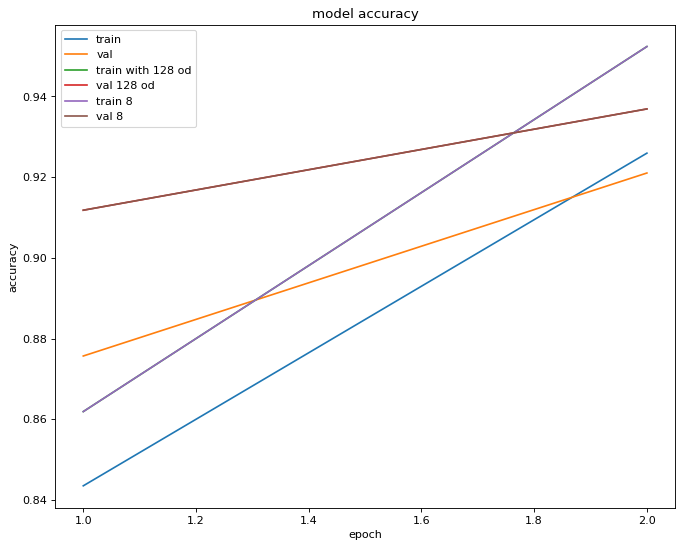

In [ ]:
figure(figsize=(10, 8), dpi=80)

xp = [i for i in range(1, 3)]

plt.plot(xp, history.history['accuracy'])
plt.plot(xp, history.history['val_accuracy'])

plt.plot(xp, history128.history['accuracy'])
plt.plot(xp, history128.history['val_accuracy'])

plt.plot(xp, history128.history['accuracy'])
plt.plot(xp, history128.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train with 128 od', 'val 128 od', 'train 8', 'val 8'], loc='upper left')
plt.show()

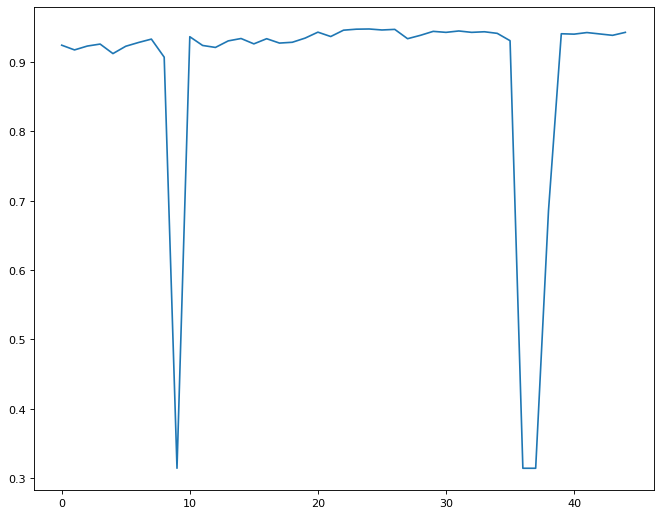

In [ ]:
figure(figsize=(10, 8), dpi=80)

y = [0.92380, 0.91700, 0.92257, 0.92542, 0.91171, 0.92228, 0.92771, 0.93257, 0.90657, 0.31457, 0.93600, 0.92342, 0.92057, 0.93000, 0.93342, 0.92571, 0.93314, 0.92685, 0.92800, 0.93400, 0.94257, 0.93628, 0.94542, 0.94685, 0.94714, 0.94571, 0.94657, 0.93314, 0.93800, 0.94371, 0.94228, 0.94428, 0.94228, 0.94314, 0.94085, 0.93028, 0.31457, 0.31457, 0.68542, 0.94028, 0.93971, 0.94200, 0.94000, 0.93800, 0.94228, ]
plt.plot(y)